# Projeto: Detecção de Objetos com YOLOv8 e Roboflow

In [1]:

# Instalação das dependências
!pip install ultralytics roboflow matplotlib scikit-learn numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

## Conexão com a API da Roboflow

In [ ]:

from roboflow import Roboflow

rf = Roboflow(api_key="privatekey")
project = rf.workspace().project("clash-of-clans-vop4y-54eob")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Clash-of-Clans-1 in yolov8:: 100%|██████████| 262/262 [00:00<00:00, 4982.58it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Treinamento com YOLOv8

In [3]:

from ultralytics import YOLO

# Criação e treinamento do modelo
model = YOLO('yolov8n.pt')

model.train(
    data=dataset.location + "/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    patience=10
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 74.0MB/s]


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Clash-of-Clans-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrain

100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]

Overriding model.yaml nc=80 with nc=16

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 22        [15, 18, 21]  1    754432  ultralytics.nn.modules.head.Detect           [16, [64, 128, 256]]          
Model summary: 129 layers, 3,013,968 parameters, 3,013,952 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1123.6±610.5 MB/s, size: 82.4 KB)


train: Scanning /content/Clash-of-Clans-1/train/labels... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<00:00, 919.55it/s]

train: New cache created: /content/Clash-of-Clans-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1765.1±539.3 MB/s, size: 103.8 KB)


val: Scanning /content/Clash-of-Clans-1/valid/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 1877.28it/s]

val: New cache created: /content/Clash-of-Clans-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.344      5.046      1.365        388        640: 100%|██████████| 6/6 [01:40<00:00, 16.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.76s/it]

                   all         24        959          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      2.082      4.956      1.218        511        640: 100%|██████████| 6/6 [01:31<00:00, 15.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.54s/it]

                   all         24        959          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.688      4.792      1.067        379        640: 100%|██████████| 6/6 [01:30<00:00, 15.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.47s/it]

                   all         24        959          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.728      4.658       1.02        526        640: 100%|██████████| 6/6 [01:40<00:00, 16.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.57s/it]

                   all         24        959          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.615      4.512     0.9789        385        640: 100%|██████████| 6/6 [01:29<00:00, 14.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.62s/it]

                   all         24        959          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.461      4.309      0.953        446        640: 100%|██████████| 6/6 [01:28<00:00, 14.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.45s/it]

                   all         24        959    0.00742     0.0182    0.00867    0.00214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.481      4.181     0.9421        559        640: 100%|██████████| 6/6 [01:30<00:00, 15.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.81s/it]

                   all         24        959     0.0267     0.0668     0.0272     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G       1.47      3.969     0.9277        302        640: 100%|██████████| 6/6 [01:26<00:00, 14.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.74s/it]

                   all         24        959     0.0225      0.148     0.0276     0.0135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.461      3.804     0.9203        490        640: 100%|██████████| 6/6 [01:30<00:00, 15.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.96s/it]

                   all         24        959     0.0406      0.331     0.0851     0.0515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.515      3.724     0.9139        496        640: 100%|██████████| 6/6 [01:34<00:00, 15.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  8.00s/it]

                   all         24        959     0.0437      0.401      0.109      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.494      3.612     0.9099        498        640: 100%|██████████| 6/6 [01:31<00:00, 15.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.60s/it]

                   all         24        959     0.0503      0.427      0.128      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.494      3.509     0.9016        511        640: 100%|██████████| 6/6 [01:30<00:00, 15.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.66s/it]

                   all         24        959     0.0578      0.455      0.159      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.424      3.329     0.8987        567        640: 100%|██████████| 6/6 [01:27<00:00, 14.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.12s/it]

                   all         24        959     0.0644      0.485      0.192      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.399      3.173     0.9012        615        640: 100%|██████████| 6/6 [01:28<00:00, 14.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.67s/it]

                   all         24        959     0.0714      0.539      0.227      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.421      3.045     0.9007        424        640: 100%|██████████| 6/6 [01:28<00:00, 14.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.06s/it]

                   all         24        959     0.0773      0.582      0.246      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.353      2.905     0.8937        319        640: 100%|██████████| 6/6 [01:34<00:00, 15.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.57s/it]

                   all         24        959     0.0826       0.61       0.26       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.416      2.821     0.8891        510        640: 100%|██████████| 6/6 [01:30<00:00, 15.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.61s/it]

                   all         24        959      0.278      0.444      0.264      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.316      2.588     0.8888        289        640: 100%|██████████| 6/6 [01:25<00:00, 14.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.70s/it]

                   all         24        959      0.721      0.201      0.282        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G       1.35      2.607     0.8877        414        640: 100%|██████████| 6/6 [01:30<00:00, 15.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.75s/it]

                   all         24        959      0.748      0.228      0.304      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.299      2.509      0.879        411        640: 100%|██████████| 6/6 [01:30<00:00, 15.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.93s/it]

                   all         24        959      0.665      0.335      0.355      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.286      2.317     0.8936        482        640: 100%|██████████| 6/6 [01:26<00:00, 14.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.72s/it]

                   all         24        959      0.614       0.36      0.376      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.302      2.338     0.8793        501        640: 100%|██████████| 6/6 [01:31<00:00, 15.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.97s/it]

                   all         24        959      0.626      0.403      0.417      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G       1.31      2.317     0.8776        612        640: 100%|██████████| 6/6 [01:33<00:00, 15.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.07s/it]

                   all         24        959      0.621      0.424      0.437      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.283      2.167     0.8785        297        640: 100%|██████████| 6/6 [01:34<00:00, 15.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.22s/it]

                   all         24        959      0.635      0.431      0.467      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.305      2.121     0.8838        403        640: 100%|██████████| 6/6 [01:29<00:00, 14.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.30s/it]

                   all         24        959      0.704      0.458      0.479      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.263      2.039     0.8709        447        640: 100%|██████████| 6/6 [01:31<00:00, 15.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.71s/it]

                   all         24        959      0.668      0.481      0.505      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.185      1.926     0.8665        572        640: 100%|██████████| 6/6 [01:28<00:00, 14.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.32s/it]

                   all         24        959      0.678      0.496      0.517      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G       1.18      1.812     0.8718        375        640: 100%|██████████| 6/6 [01:30<00:00, 15.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.82s/it]

                   all         24        959      0.694      0.481      0.536      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.207      1.855     0.8716        437        640: 100%|██████████| 6/6 [01:32<00:00, 15.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.11s/it]

                   all         24        959      0.624       0.49      0.544      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G       1.19      1.814     0.8649        507        640: 100%|██████████| 6/6 [01:40<00:00, 16.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.66s/it]

                   all         24        959      0.619      0.522      0.571      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.217      1.796     0.8693        575        640: 100%|██████████| 6/6 [01:32<00:00, 15.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.16s/it]

                   all         24        959      0.608      0.546      0.579      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.177      1.693     0.8625        600        640: 100%|██████████| 6/6 [01:28<00:00, 14.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.17s/it]

                   all         24        959      0.619      0.563      0.599      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.108      1.638     0.8622        481        640: 100%|██████████| 6/6 [01:31<00:00, 15.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.99s/it]

                   all         24        959      0.617      0.568      0.605      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.151      1.569      0.865        300        640: 100%|██████████| 6/6 [01:32<00:00, 15.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.26s/it]

                   all         24        959        0.6      0.584       0.62      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G       1.15       1.57     0.8584        337        640: 100%|██████████| 6/6 [01:30<00:00, 15.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.33s/it]

                   all         24        959        0.6      0.588      0.627      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.168      1.583     0.8597        418        640: 100%|██████████| 6/6 [01:32<00:00, 15.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.55s/it]

                   all         24        959      0.661      0.577      0.641      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.101      1.521     0.8547        398        640: 100%|██████████| 6/6 [01:31<00:00, 15.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.94s/it]

                   all         24        959      0.646      0.568      0.647      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G       1.08       1.43     0.8648        260        640: 100%|██████████| 6/6 [01:31<00:00, 15.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.23s/it]

                   all         24        959      0.608      0.593      0.656      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G       1.11       1.43     0.8674        504        640: 100%|██████████| 6/6 [01:29<00:00, 14.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.05s/it]

                   all         24        959      0.633      0.605      0.661      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.069       1.37     0.8575        384        640: 100%|██████████| 6/6 [01:26<00:00, 14.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.43s/it]

                   all         24        959      0.663      0.606      0.677      0.533


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9783      1.235     0.8568        319        640: 100%|██████████| 6/6 [01:19<00:00, 13.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.15s/it]

                   all         24        959      0.675      0.603      0.682      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.9756       1.22     0.8576        319        640: 100%|██████████| 6/6 [01:20<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.20s/it]

                   all         24        959      0.697      0.608      0.691      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9763      1.197     0.8483        321        640: 100%|██████████| 6/6 [01:19<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  9.00s/it]

                   all         24        959      0.688      0.621      0.694      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9621      1.166     0.8458        317        640: 100%|██████████| 6/6 [01:19<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.34s/it]

                   all         24        959       0.69      0.621      0.705      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      0.952      1.161     0.8468        319        640: 100%|██████████| 6/6 [01:18<00:00, 13.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.51s/it]

                   all         24        959      0.711      0.623      0.706      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9632      1.177      0.846        319        640: 100%|██████████| 6/6 [01:17<00:00, 12.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.59s/it]

                   all         24        959      0.718      0.619      0.712      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.9426      1.138     0.8492        318        640: 100%|██████████| 6/6 [01:17<00:00, 12.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.49s/it]

                   all         24        959      0.706      0.625      0.713      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.9694      1.154     0.8465        320        640: 100%|██████████| 6/6 [01:19<00:00, 13.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.45s/it]

                   all         24        959      0.708      0.625      0.718      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.001       1.21     0.8548        320        640: 100%|██████████| 6/6 [01:18<00:00, 13.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.75s/it]

                   all         24        959      0.835      0.613      0.719      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.9373       1.12     0.8459        319        640: 100%|██████████| 6/6 [01:19<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.17s/it]

                   all         24        959      0.714      0.626      0.722      0.569



50 epochs completed in 1.358 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.11s/it]


                   all         24        959      0.713      0.625      0.722       0.57
                    AD         24         96      0.899          1      0.995      0.816
            AirSweeper         24         48      0.416     0.0748       0.34      0.187
             BombTower         24         48      0.916      0.914      0.954      0.759
                 Canon         24        167       0.91      0.946      0.975      0.792
            ClanCastle         24         24      0.468      0.208      0.387      0.276
                 Eagle         24         24       0.85      0.942      0.948      0.825
               Inferno         24         72      0.907      0.972      0.983      0.755
               KingPad         24         24      0.287      0.052      0.291      0.181
                Mortar         24         96      0.904      0.917      0.959      0.787
              QueenPad         24         24      0.616      0.135      0.441      0.315
                 RcPa

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b84b8239dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044

## Avaliação do Modelo - Métricas

In [4]:

metrics = model.val()

print(metrics)


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 837.5±443.0 MB/s, size: 106.7 KB)


val: Scanning /content/Clash-of-Clans-1/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.66s/it]


                   all         24        959      0.713      0.625      0.722       0.57
                    AD         24         96      0.899          1      0.995      0.816
            AirSweeper         24         48      0.416     0.0748       0.34      0.187
             BombTower         24         48      0.916      0.914      0.954      0.759
                 Canon         24        167       0.91      0.946      0.975      0.792
            ClanCastle         24         24      0.468      0.208      0.387      0.276
                 Eagle         24         24       0.85      0.942      0.948      0.825
               Inferno         24         72      0.907      0.972      0.983      0.755
               KingPad         24         24      0.287      0.052      0.291      0.181
                Mortar         24         96      0.904      0.917      0.959      0.787
              QueenPad         24         24      0.616      0.135      0.441      0.315
                 RcPa

## Testes em novas imagens


image 1/13 /content/Clash-of-Clans-1/test/images/20200920093240_jpg.rf.bc83c5d66a9f8919cd203adbf82a8786.jpg: 640x640 4 ADs, 2 BombTowers, 10 Canons, 1 Eagle, 2 Infernos, 4 Mortars, 2 Scattershots, 1 TH13, 5 WizzTowers, 6 Xbows, 461.1ms
image 2/13 /content/Clash-of-Clans-1/test/images/20210117131843_jpg.rf.6bc7c7c090428cc990ef9d2790b4e06e.jpg: 640x640 4 ADs, 2 AirSweepers, 2 BombTowers, 7 Canons, 4 Infernos, 2 Mortars, 3 Scattershots, 1 TH13, 5 WizzTowers, 6 Xbows, 1011.1ms
image 3/13 /content/Clash-of-Clans-1/test/images/20210117132140_jpg.rf.9365d91019ede5c2f908718be23a7eac.jpg: 640x640 5 ADs, 1 BombTower, 7 Canons, 1 ClanCastle, 1 Eagle, 4 Infernos, 5 Mortars, 1 TH13, 5 WizzTowers, 7 Xbows, 1064.3ms
image 4/13 /content/Clash-of-Clans-1/test/images/IMG_1885_jpg.rf.71755c61564121dce3c8464014e64faa.jpg: 640x640 2 ADs, 2 AirSweepers, 1 Canon, 2 Eagles, 4 Infernos, 1 Mortar, 1 QueenPad, 2 Scattershots, 2 TH13s, 5 WizzTowers, 9 Xbows, 842.9ms
image 5/13 /content/Clash-of-Clans-1/test/imag

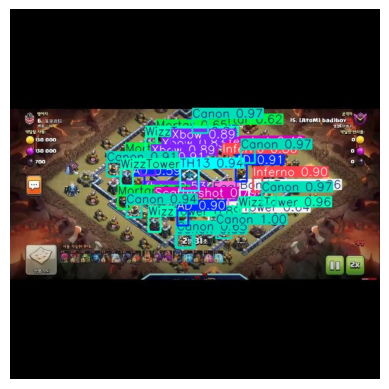

In [5]:

import matplotlib.pyplot as plt
from PIL import Image

results = model.predict(dataset.location + "/test/images", save=True)

# Exemplo de visualização
img_path = results[0].save_dir + "/" + results[0].path.split("/")[-1]
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()


## Ajuste de Hiperparâmetros

In [6]:

# Exemplos de ajustes: epochs, batch_size, learning_rate etc.
# Basta rodar novamente o model.train() com novos parâmetros


## Exportação de Resultados

In [7]:

model.export(format='onnx')  # Exporta o modelo para ONNX


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 20, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.58...
ONNX: export success ✅ 7.3s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (7.9s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val tas

'runs/detect/train/weights/best.onnx'